In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/RFM data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,392735.0,560624.318859,13113.076784,536365.00,549233.00,561894.00,572103.00,581587.00
Quantity,392735.0,10.242645,16.172009,1.00,2.00,5.00,12.00,147.00
UnitPrice,392735.0,2.787111,2.704759,0.12,1.25,1.95,3.75,19.96
CustomerID,392735.0,15300.835136,1709.095993,12347.00,13975.00,15159.00,16800.00,18287.00
TotalPrice,392735.0,18.246537,32.558080,0.12,4.68,11.70,19.50,1914.24


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [ ]:
df.duplicated().sum()

5182

In [ ]:
# drop duplicates

df.drop_duplicates(inplace=True)


<Axes: >

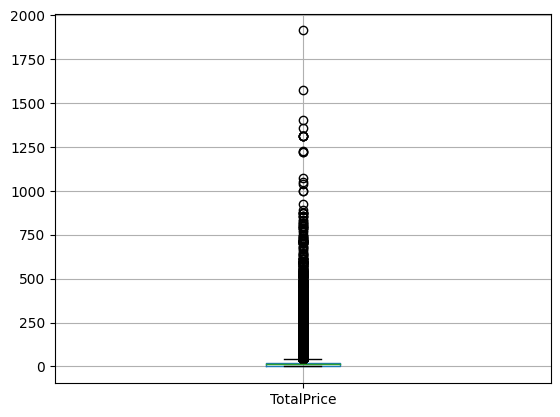

In [ ]:
df.boxplot("TotalPrice")

In [ ]:
# remove outliers in df['TotalPrice']

Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~(df['TotalPrice'] < lower_bound) | (df['TotalPrice'] > upper_bound)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387553 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387553 non-null  int64  
 1   StockCode    387553 non-null  object 
 2   Description  387553 non-null  object 
 3   Quantity     387553 non-null  int64  
 4   InvoiceDate  387553 non-null  object 
 5   UnitPrice    387553 non-null  float64
 6   CustomerID   387553 non-null  float64
 7   Country      387553 non-null  object 
 8   TotalPrice   387553 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 29.6+ MB


In [ ]:
#  List of Categorical variable to plot in dataset

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)


['StockCode', 'Description', 'InvoiceDate', 'Country']


In [ ]:
from sklearn import preprocessing

for col in df.select_dtypes(include=["object"]).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col]=label_encoder.transform(df[col])
  print(f'{col}:{df[col].unique()}')

StockCode:[3203 2619 2822 ... 3626 3628 3428]
Description:[3660 3668  849 ... 1886 2423  852]
InvoiceDate:[    0     1     2 ... 16856 16857 16858]
Country:[35 13  0 23 14 24 10 32 30 25 26 18  3 21 19 16  6  9  7 12  1 31 15 29
 20 34 17 28  8  5 36  4 33 11  2 22 27]


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,3203,3660,6,0,2.55,17850.0,35,15.30
1,536365,2619,3668,6,0,3.39,17850.0,35,20.34
2,536365,2822,849,8,0,2.75,17850.0,35,22.00
3,536365,2771,1789,6,0,3.39,17850.0,35,20.34
4,536365,2770,2737,6,0,3.39,17850.0,35,20.34


In [ ]:
df.corr()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
InvoiceNo,1.000000,0.087912,0.026088,-0.020025,0.999897,-0.040241,0.000600,0.009533,-0.026945
StockCode,0.087912,1.000000,-0.013280,-0.003747,0.087862,0.063926,0.015550,0.029903,0.038364
Description,0.026088,-0.013280,1.000000,0.010906,0.025866,-0.023972,-0.002392,-0.010359,0.001131
Quantity,-0.020025,-0.003747,0.010906,1.000000,-0.020547,-0.237454,-0.081181,-0.120245,0.632503
InvoiceDate,0.999897,0.087862,0.025866,-0.020547,1.000000,-0.040275,0.000990,0.009898,-0.027278
UnitPrice,-0.040241,0.063926,-0.023972,-0.237454,-0.040275,1.000000,-0.014014,-0.016957,0.170568
CustomerID,0.000600,0.015550,-0.002392,-0.081181,0.000990,-0.014014,1.000000,0.382933,-0.066127
Country,0.009533,0.029903,-0.010359,-0.120245,0.009898,-0.016957,0.382933,1.000000,-0.114800
TotalPrice,-0.026945,0.038364,0.001131,0.632503,-0.027278,0.170568,-0.066127,-0.114800,1.000000


<Axes: >

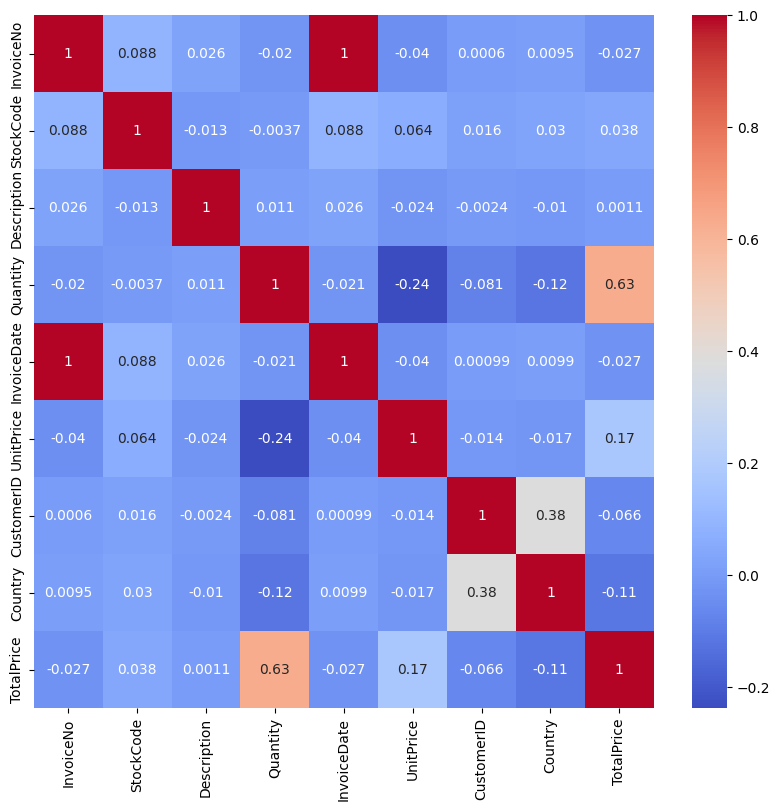

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387553 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387553 non-null  int64  
 1   StockCode    387553 non-null  int64  
 2   Description  387553 non-null  int64  
 3   Quantity     387553 non-null  int64  
 4   InvoiceDate  387553 non-null  int64  
 5   UnitPrice    387553 non-null  float64
 6   CustomerID   387553 non-null  float64
 7   Country      387553 non-null  int64  
 8   TotalPrice   387553 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 29.6 MB


In [ ]:
# prompt: find recency in df

df['recency'] = df['InvoiceNo'].max() - df['InvoiceNo']
df['recency'] = df['recency']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,recency
0,536365,3203,3660,6,0,2.55,17850.0,35,15.30,45222
1,536365,2619,3668,6,0,3.39,17850.0,35,20.34,45222
2,536365,2822,849,8,0,2.75,17850.0,35,22.00,45222
3,536365,2771,1789,6,0,3.39,17850.0,35,20.34,45222
4,536365,2770,2737,6,0,3.39,17850.0,35,20.34,45222


In [ ]:
current_date = df['InvoiceDate'].max()
recency_data = df.groupby('InvoiceNo')['InvoiceDate'].max().reset_index()
print(recency_data)
recency_data['Recency'] = (current_date-recency_data['InvoiceDate'])
print(recency_data[['InvoiceNo','Recency']].head())
recency_data

       InvoiceNo  InvoiceDate
0         536365            0
1         536366            1
2         536367            2
3         536368            2
4         536369            3
...          ...          ...
18041     581583        16854
18042     581584        16855
18043     581585        16856
18044     581586        16857
18045     581587        16858

[18046 rows x 2 columns]
   InvoiceNo  Recency
0     536365    16858
1     536366    16857
2     536367    16856
3     536368    16856
4     536369    16855


,InvoiceNo,InvoiceDate,Recency
0,536365,0,16858
1,536366,1,16857
2,536367,2,16856
3,536368,2,16856
4,536369,3,16855
...,...,...,...
18041,581583,16854,4
18042,581584,16855,3
18043,581585,16856,2
18044,581586,16857,1


In [ ]:
frequency_data=df.groupby("InvoiceNo")["InvoiceDate"].count().reset_index()
frequency_data.columns=["InvoiceNo","Frequency"]
frequency_data

,InvoiceNo,Frequency
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1
...,...,...
18041,581583,2
18042,581584,2
18043,581585,21
18044,581586,4


In [ ]:
monetary_data = df.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()
monetary_data.columns = ['InvoiceNo','Monetary']
print(monetary_data.head())

   InvoiceNo  Monetary
0     536365    139.12
1     536366     22.20
2     536367    278.73
3     536368     70.05
4     536369     17.85


2) Calculate RFM scores.
Each customer will get a note between 1 and 5 for each parameter
for Recency(R), Frequency(F) and Monetary value(M)


In [ ]:
rfmdata=pd.merge(recency_data,frequency_data,on="InvoiceNo")
rfmdata=pd.merge(rfmdata,monetary_data,on="InvoiceNo")
x=rfmdata[["Recency","Frequency","Monetary"]]
rfmdata

,InvoiceNo,InvoiceDate,Recency,Frequency,Monetary
0,536365,0,16858,7,139.12
1,536366,1,16857,2,22.20
2,536367,2,16856,12,278.73
3,536368,2,16856,4,70.05
4,536369,3,16855,1,17.85
...,...,...,...,...,...
18041,581583,16854,4,2,124.60
18042,581584,16855,3,2,140.64
18043,581585,16856,2,21,329.05
18044,581586,16857,1,4,339.20


In [ ]:
rfmdata = rfmdata.drop(columns=["InvoiceDate"])
rfmdata


,InvoiceNo,Recency,Frequency,Monetary
0,536365,16858,7,139.12
1,536366,16857,2,22.20
2,536367,16856,12,278.73
3,536368,16856,4,70.05
4,536369,16855,1,17.85
...,...,...,...,...
18041,581583,4,2,124.60
18042,581584,3,2,140.64
18043,581585,2,21,329.05
18044,581586,1,4,339.20


In [ ]:
rfmdata['R_rank'] = rfmdata['Recency'].rank(ascending=False)
rfmdata['F_rank'] = rfmdata['Frequency'].rank(ascending=True)
rfmdata['M_rank'] = rfmdata['Monetary'].rank(ascending=True)

In [ ]:
rfmdata['R_rank_norm'] = (rfmdata['R_rank']/rfmdata['R_rank'].max())*100
rfmdata['F_rank_norm'] = (rfmdata['F_rank']/rfmdata['F_rank'].max())*100
rfmdata['M_rank_norm'] = (rfmdata['M_rank']/rfmdata['M_rank'].max())*100

rfmdata.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
rfmdata.head()

,InvoiceNo,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,536365,16858,7,139.12,0.005541,25.526432,22.409398
1,536366,16857,2,22.20,0.011083,8.328716,3.177990
2,536367,16856,12,278.73,0.019395,40.701541,48.254461
3,536368,16856,4,70.05,0.019395,15.529757,8.422919
4,536369,16855,1,17.85,0.027707,3.186302,2.646016


In [ ]:
rfmdata['RFM_Score'] = 0.15*rfmdata['R_rank_norm']+0.28 * rfmdata['F_rank_norm']+0.57*rfmdata['M_rank_norm']
rfmdata['RFM_Score'] *= 0.05
rfmdata = rfmdata.round(2)
rfmdata[['InvoiceNo','RFM_Score']].head(7)

,InvoiceNo,RFM_Score
0,536365,1.00
1,536366,0.21
2,536367,1.95
3,536368,0.46
4,536369,0.12
5,536370,3.44
6,536371,1.07


In [ ]:
# Segment the customers based on their RFM scores using the dataset?

rfm_segments = rfmdata.groupby('RFM_Score')['InvoiceNo'].count().reset_index()
rfm_segments.columns = ['RFM_Score', 'Count']
rfm_segments['Segment'] = pd.cut(rfm_segments['RFM_Score'], 4, labels=['Platinum', 'Gold', 'Silver', 'Bronze'])
rfm_segments


,RFM_Score,Count,Segment
0,0.06,3,Platinum
1,0.08,4,Platinum
2,0.09,3,Platinum
3,0.10,5,Platinum
4,0.11,3,Platinum
...,...,...,...
483,4.91,1,Bronze
484,4.92,1,Bronze
485,4.94,2,Bronze
486,4.95,2,Bronze


a) Visualize the RFM segments.
b) Conclude your findings of RFM analysis and suggest some
strategies on it.

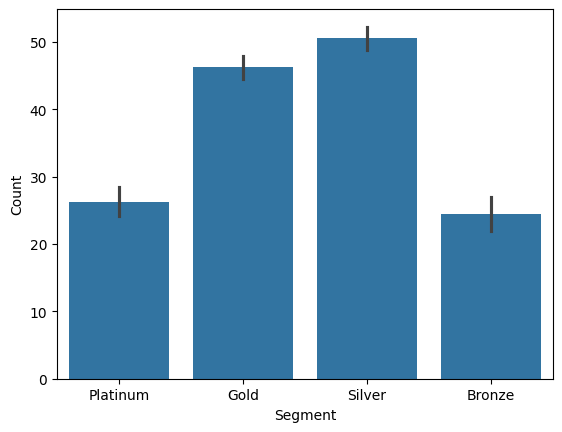

In [ ]:
#  Visualize the RFM segments

import seaborn as sns

# Create a bar chart of the number of customers in each segment
sns.barplot(x='Segment', y='Count', data=rfm_segments)
plt.show()




# b)Conclude your findings of RFM analysis and suggest some strategies on it.

**Findings:**

* The RFM analysis has segmented the customers into four groups: Platinum, Gold, Silver, and Bronze.
* The Platinum segment is the most valuable, with the highest recency, frequency, and monetary values.
* The Bronze segment is the least valuable, with the lowest recency, frequency, and monetary values.

**Strategies:**

* **Platinum customers:** These customers are the most loyal and valuable to the business. They should be targeted with personalized marketing campaigns and exclusive offers to keep them engaged.
* **Gold customers:** These customers are also valuable to the business, but they are not as loyal as Platinum customers. They should be targeted with marketing campaigns that focus on building loyalty and increasing their frequency of purchase.
* **Silver customers:** These customers are less valuable than Gold and Platinum customers, but they still have the potential to become more valuable. They should be targeted with marketing campaigns that focus on increasing their frequency of purchase and monetary value.
* **Bronze customers:** These customers are the least valuable to the business, but they can still be profitable. They should be targeted with marketing campaigns that focus on increasing their recency and frequency of purchase.

In addition to these general strategies, the business can also use the RFM analysis to develop more specific strategies for each customer segment. For example, the business could target Platinum customers with exclusive offers on new products or services, while targeting Bronze customers with discounts and promotions.

Overall, the RFM analysis is a valuable tool that can help businesses understand their customers and develop more effective marketing strategies.